<a href="https://colab.research.google.com/github/kkatherineliu/machine-learning-basics/blob/main/fcc_bikes_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## notes

still under supervised learning category btw

assumptions: linearity, independence (of samples), normality of residuals, homoscedasticity (even spread on both sides of the x-axis of the residual plot)

fitting to a line of best fit (simple linear regression)
$y = b_0 + b_1x$
(multiple linear regression) $y = b_0 + b_1x_1 + b_2x_2 +... b_nx_n$

residual = $|y_i - \hat{y}_i|$

ways to evaluate!!
MAE - mean absolute error

MSE - mean squared error

RMSE - root MSE (same unit as the y axis)

$R^2$ - coeff of determination, = 1 - RSS/TSS (sum of squared residuals -- error with respect to the line, divided by total sum of squares -- error with respect to the average y value)

^^ note that R^2 approaches one when RSS < TSS (which is what we want)



## code

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

In [80]:
# cleaning up/restructuring the data

dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1) # axis = 1 means drop columns
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int) # turn Yes into 1

df = df[df["hour"] == 12] # limit our dataset to when the hour is 12 (so since its all the same now we can also drop)
df = df.drop(["hour"], axis = 1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


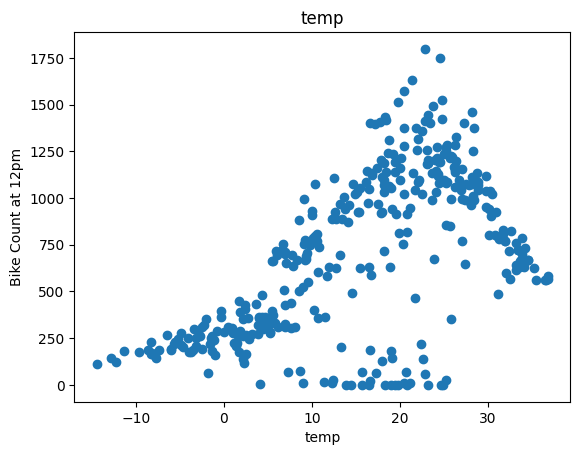

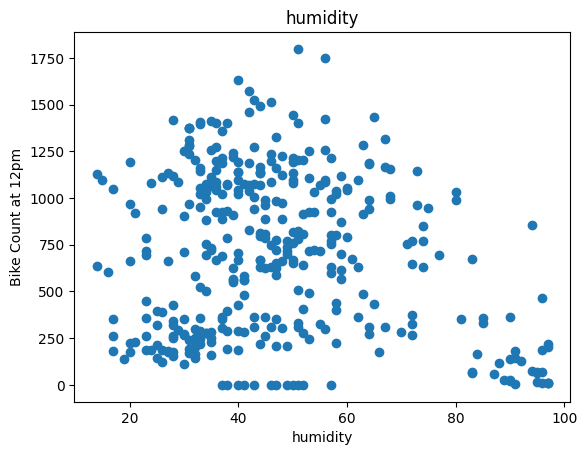

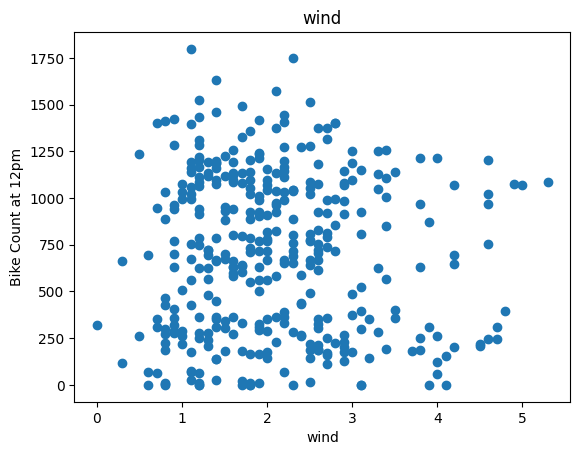

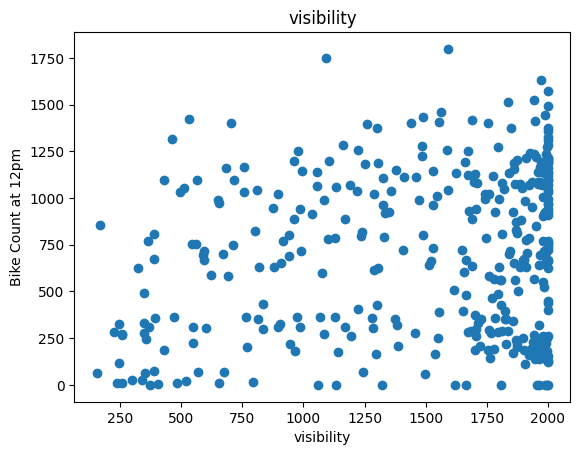

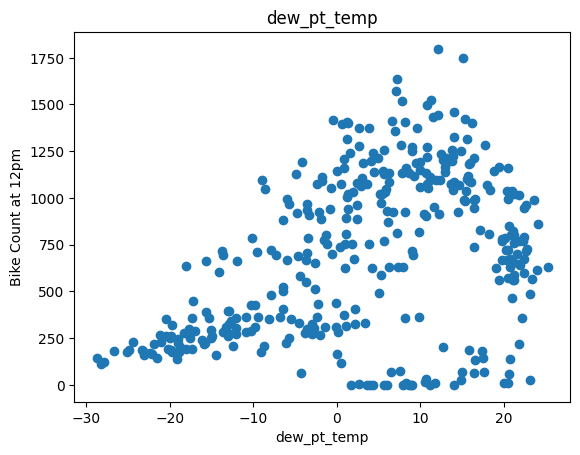

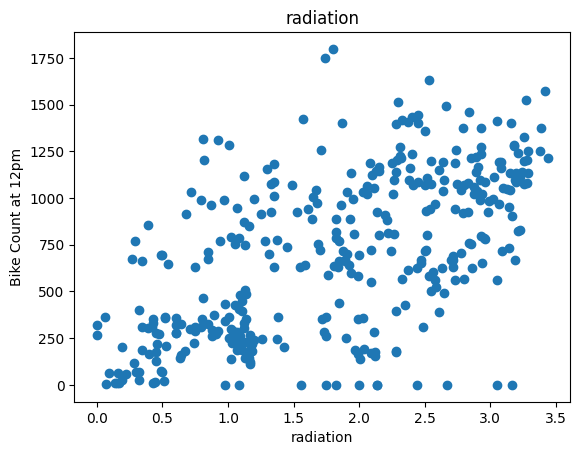

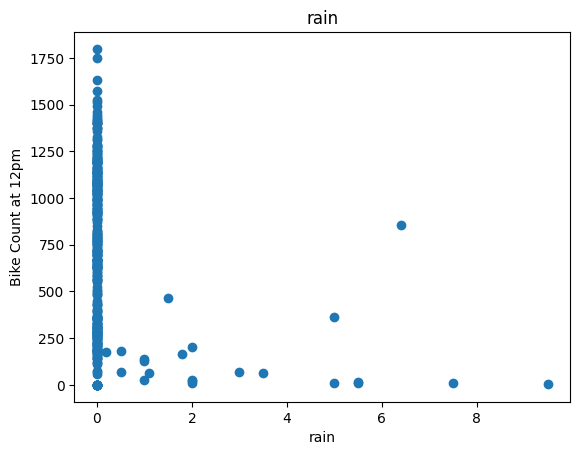

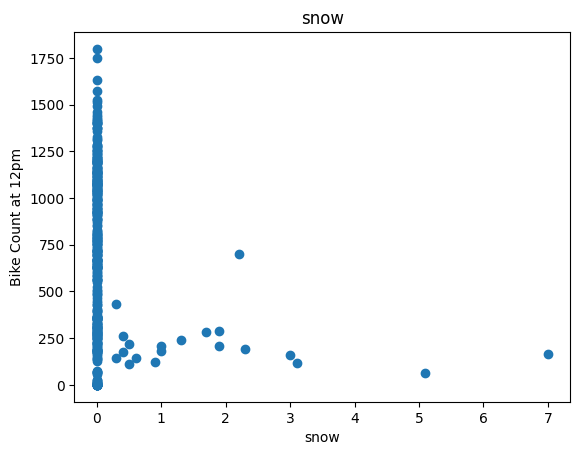

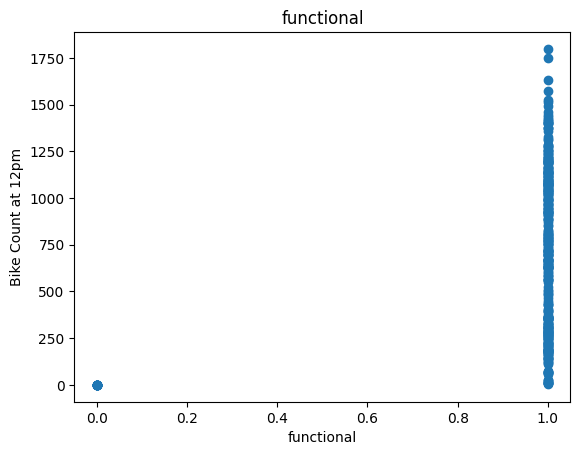

In [82]:
for label in df.columns[1:]: # everything from temperature onwards (features)
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Bike Count at 12pm")
  plt.show()

after the inspection from the charts above, we need to follow the assumptions necessary so we drop more categories that don't have linear relationships/something meaningful to analyze

In [83]:
df = df.drop(["wind", "visibility", "functional"], axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Splitting the datasets

In [8]:
train, val, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

In [13]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    # exclude the column for bike count
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1,1) # make into 2d to apply hstack
  data = np.hstack((X, y))

  return data, X, y

In [24]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [11]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)
print(temp_reg.coef_, temp_reg.intercept_)
print(temp_reg.score(X_test_temp, y_test_temp))

[[21.17020602]] [390.70310401]
0.34048118802540384


In [37]:
def temp_scatterplot(model):
  plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
  x = tf.linspace(-20, 40, 100)
  plt.plot(x, model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
  plt.legend()
  plt.title("Bikes vs Temp")
  plt.ylabel("Number of bikes")
  plt.xlabel("Temperature")
  return plt.show()

# note that its technically not following the right assumptions again, just to demo

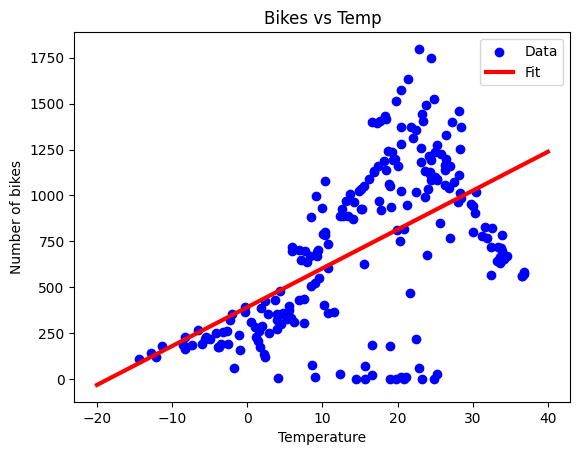

In [38]:
temp_scatterplot(temp_reg)

In [23]:
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [17]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)
all_reg.score(X_test_all, y_test_all) # better than previous

0.4162820590204239

# Regression with Neural Network

In [25]:
def plot_loss(history):
  plt.plot(history.history["loss"], label="loss")
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE (Mean Squared Error)')
  plt.legend()
  plt.grid(True)
  plt.show()

In [18]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [21]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1) # one single node = linear, no activation function = output linear as well
])

In [22]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error")

In [28]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose = 0, epochs = 1000, validation_data=(X_val_temp, y_val_temp)
)

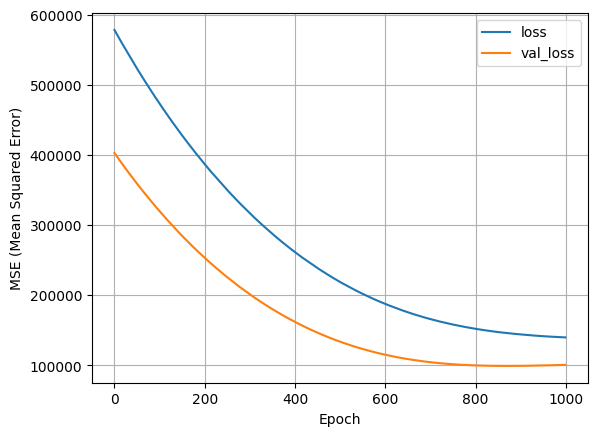

In [29]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


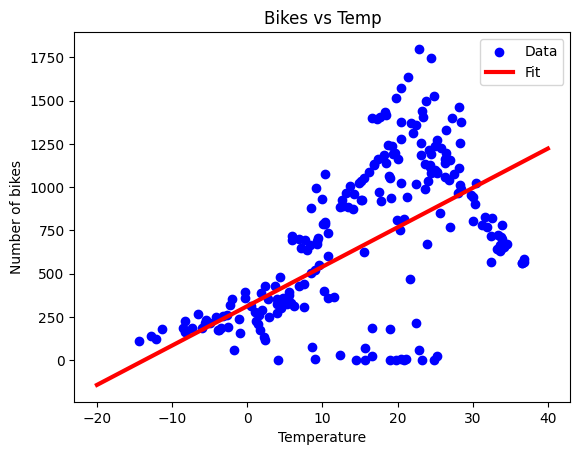

In [39]:
temp_scatterplot(temp_nn_model)

# Proper Neural Net

In [60]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"), # just playing around w the numbers here, still not sure what is ideal
    tf.keras.layers.Dense(1)
    # also works fine w relu as ouput bc relu 0 for values <0 and a non-horizontal linear function after 0 and all our values here are >0 anywyas
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

In [57]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    verbose=0, validation_data=(X_val_temp, y_val_temp),
    epochs=100
)

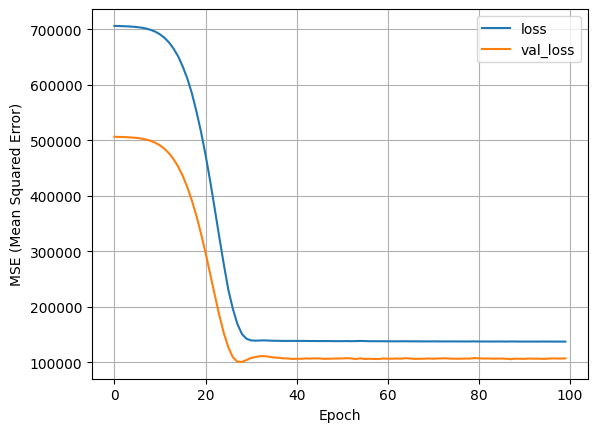

In [58]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


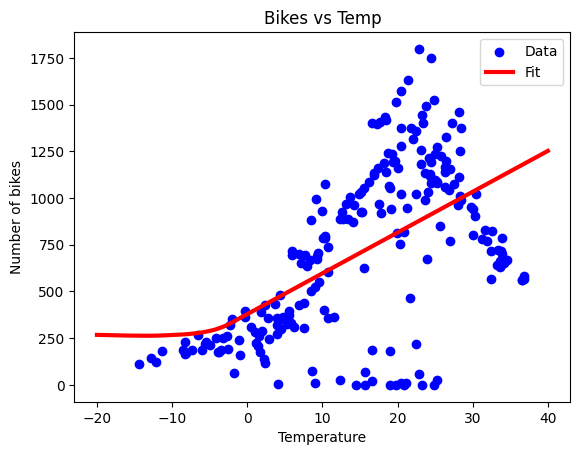

In [59]:
temp_scatterplot(nn_model)

above is simple linear, below is multiple linear

In [67]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

all_nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

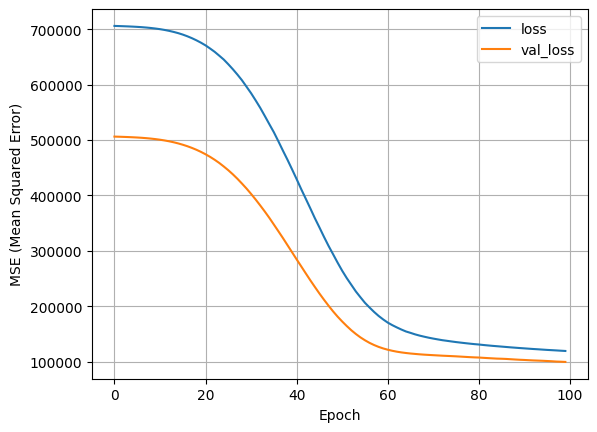

In [68]:
history = all_nn_model.fit(
    X_train_all, y_train_all,
    verbose=0, validation_data=(X_val_all, y_val_all),
    epochs=100
)
plot_loss(history)

calculate and compare the MSE for the linear regressor and neural net

In [69]:
y_pred_linear_reg = all_reg.predict(X_test_all)
y_pred_nn = all_nn_model.predict(X_test_all)

3/3 [==============================] - 0s 2ms/step


In [70]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean();


In [72]:
MSE(y_pred_linear_reg, y_test_all)

92073.74105083557

In [73]:
MSE(y_pred_nn, y_test_all)

100886.4550600727

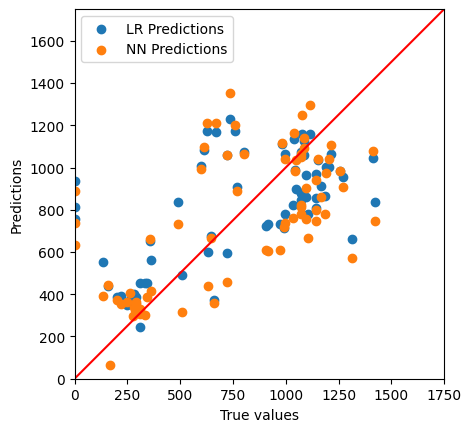

In [78]:
# interesting that the nn performs worse so let's investigate more
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_linear_reg, label="LR Predictions")
plt.scatter(y_test_all, y_pred_nn, label="NN Predictions")
plt.xlabel("True values")
plt.ylabel("Predictions")
lims = [0, 1750]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")

personal closing thoughts:

in the multiple one, the LinearRegression() works better but for the example with just one variable like temp, the nn would be better (but probably only because the assumption that it's linear doesn't hold as well for temperature)